In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
disease = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\data files\data december\Disease_symptom_and_patient_profile_dataset.csv")
disease.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [3]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [4]:
disease['Outcome Variable'].value_counts().to_frame()

,Outcome Variable
Positive,186
Negative,163


,Disease
Asthma,18
Stroke,11
Osteoporosis,7
Influenza,6
Diabetes,5
...,...
Allergic Rhinitis,1
Cataracts,1
Pneumocystis Pneumonia (PCP),1
Scoliosis,1


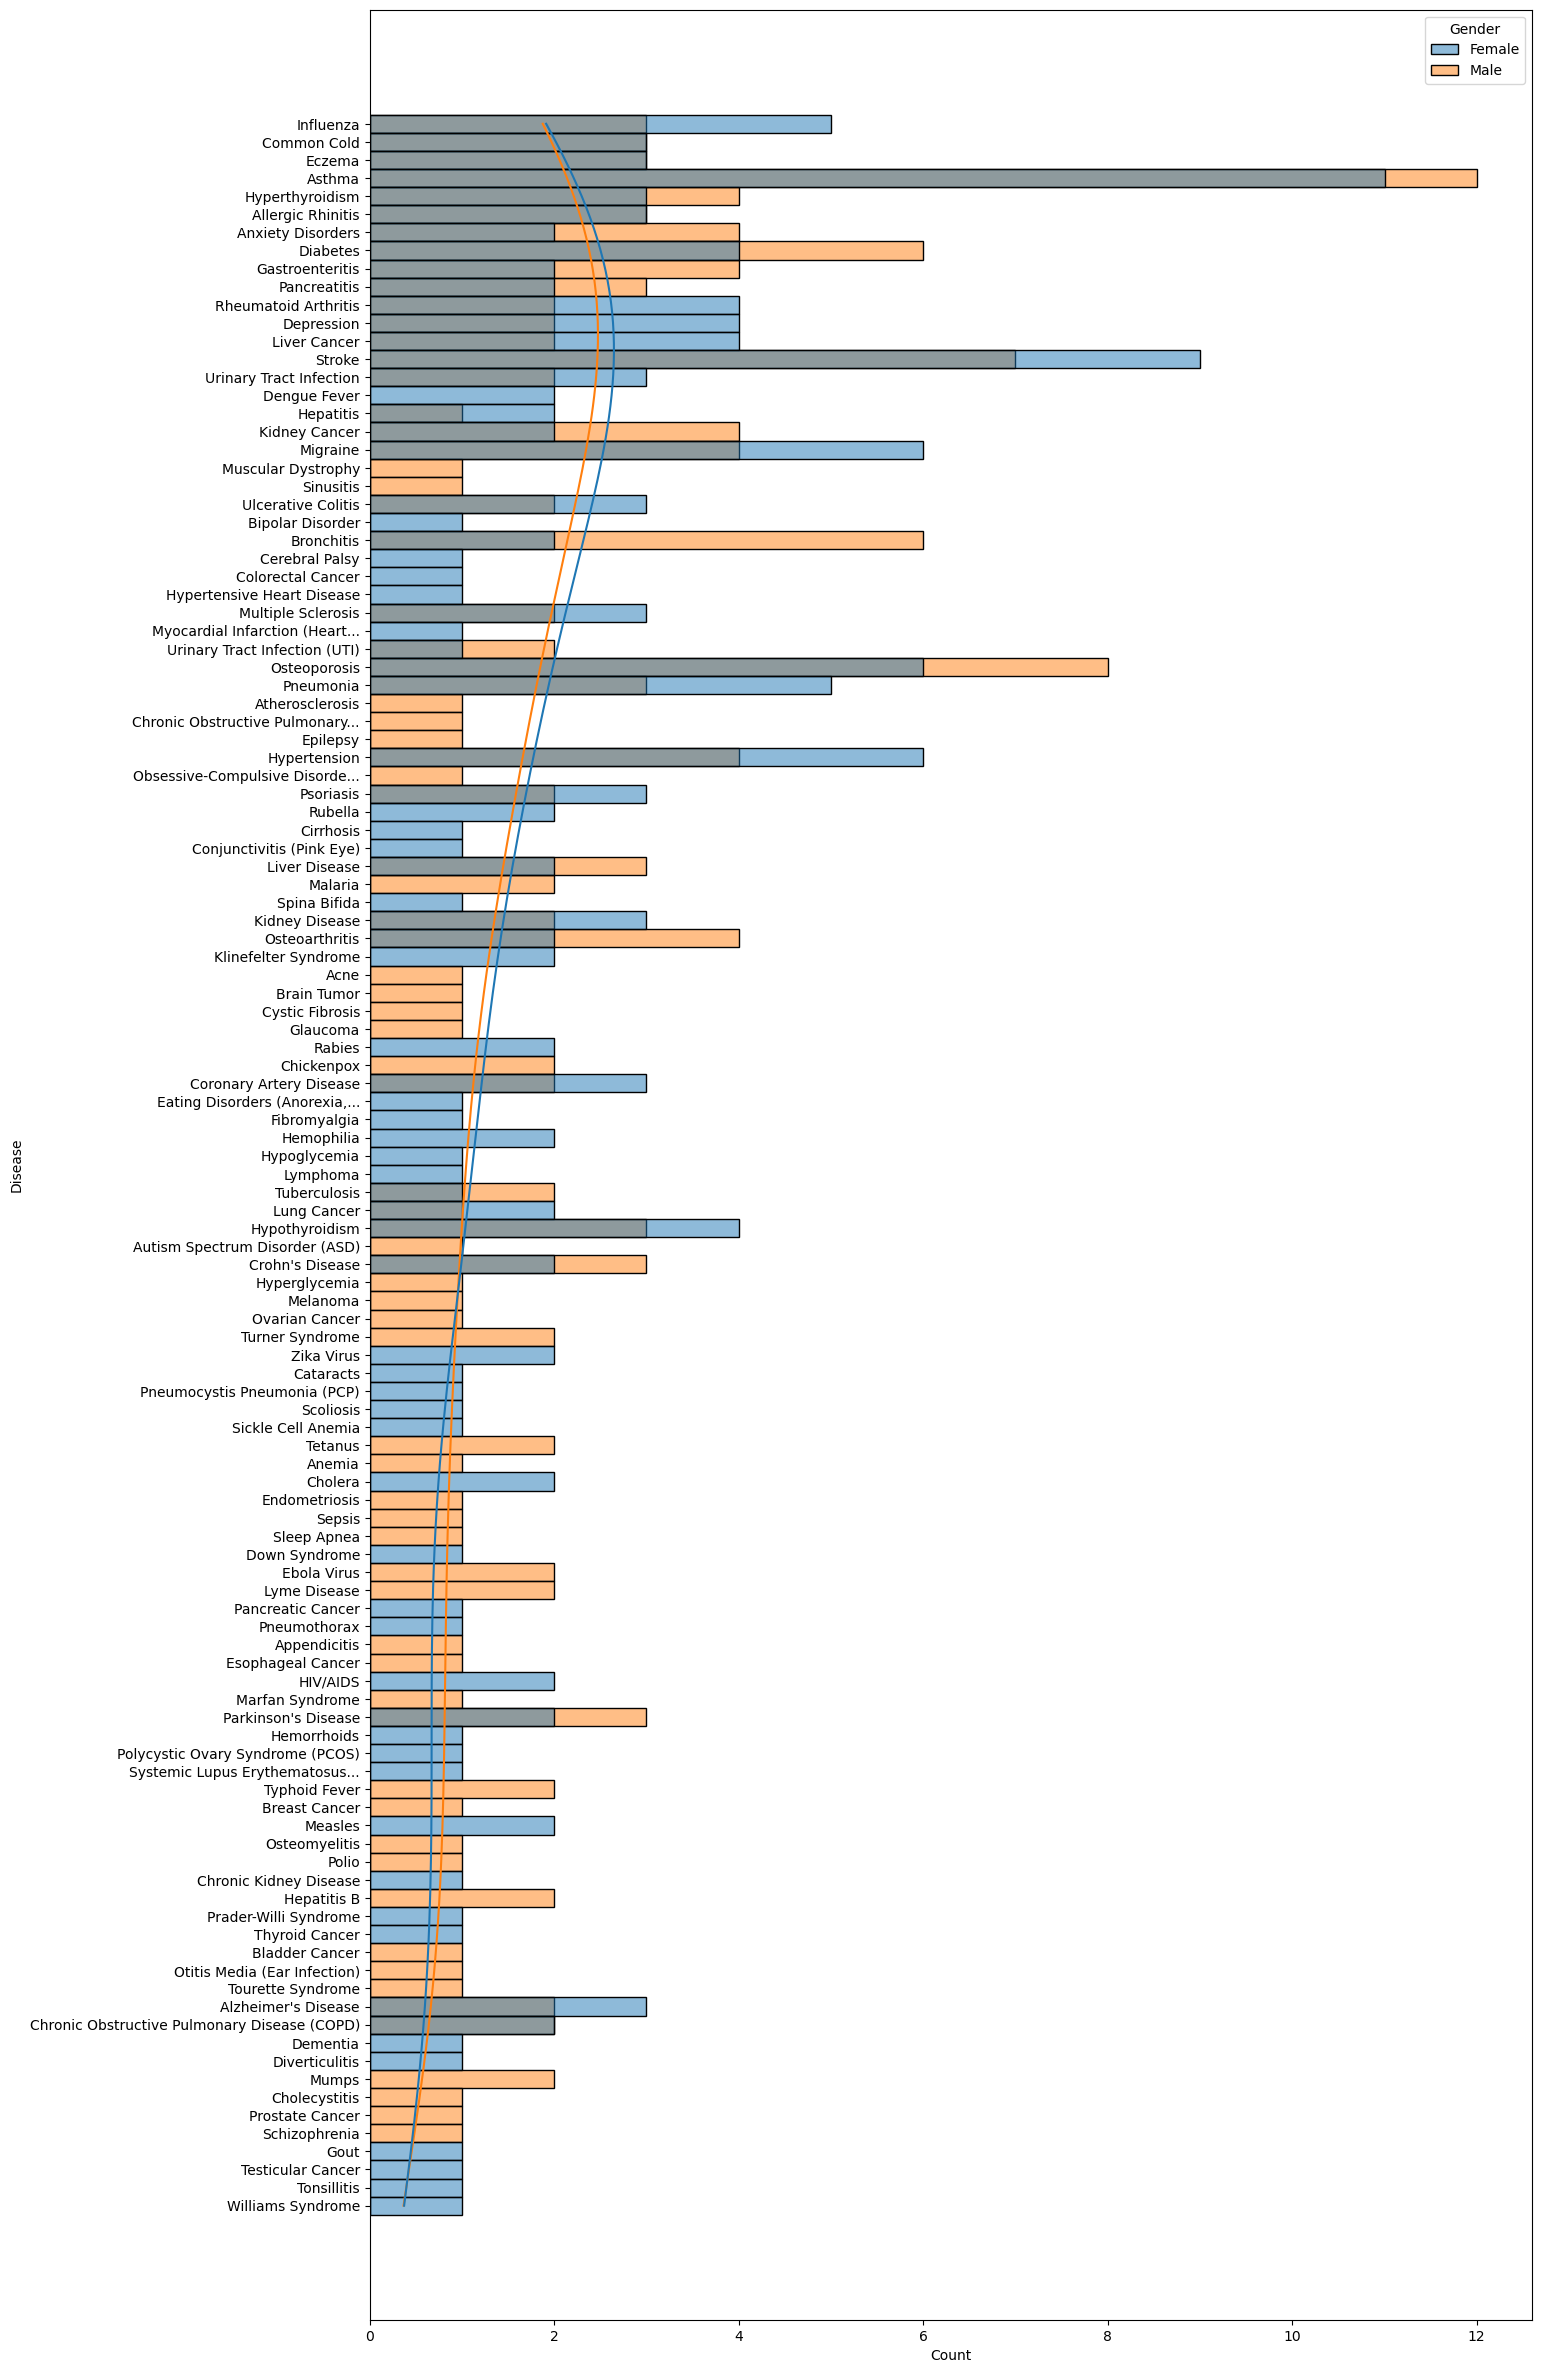

In [5]:
fig, ax = plt.subplots(figsize=(15, 30))
sns.histplot(data = disease, y = "Disease", kde = True, hue = "Gender")
plt.show()


Lets filter out the negative outcomes so we can look at the data containing positive outcomes

In [6]:
disease['Blood Pressure'].value_counts().to_frame()

,Blood Pressure
High,167
Normal,164
Low,18


In [7]:
positive = disease[disease['Outcome Variable'] == 'Positive']
positive


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


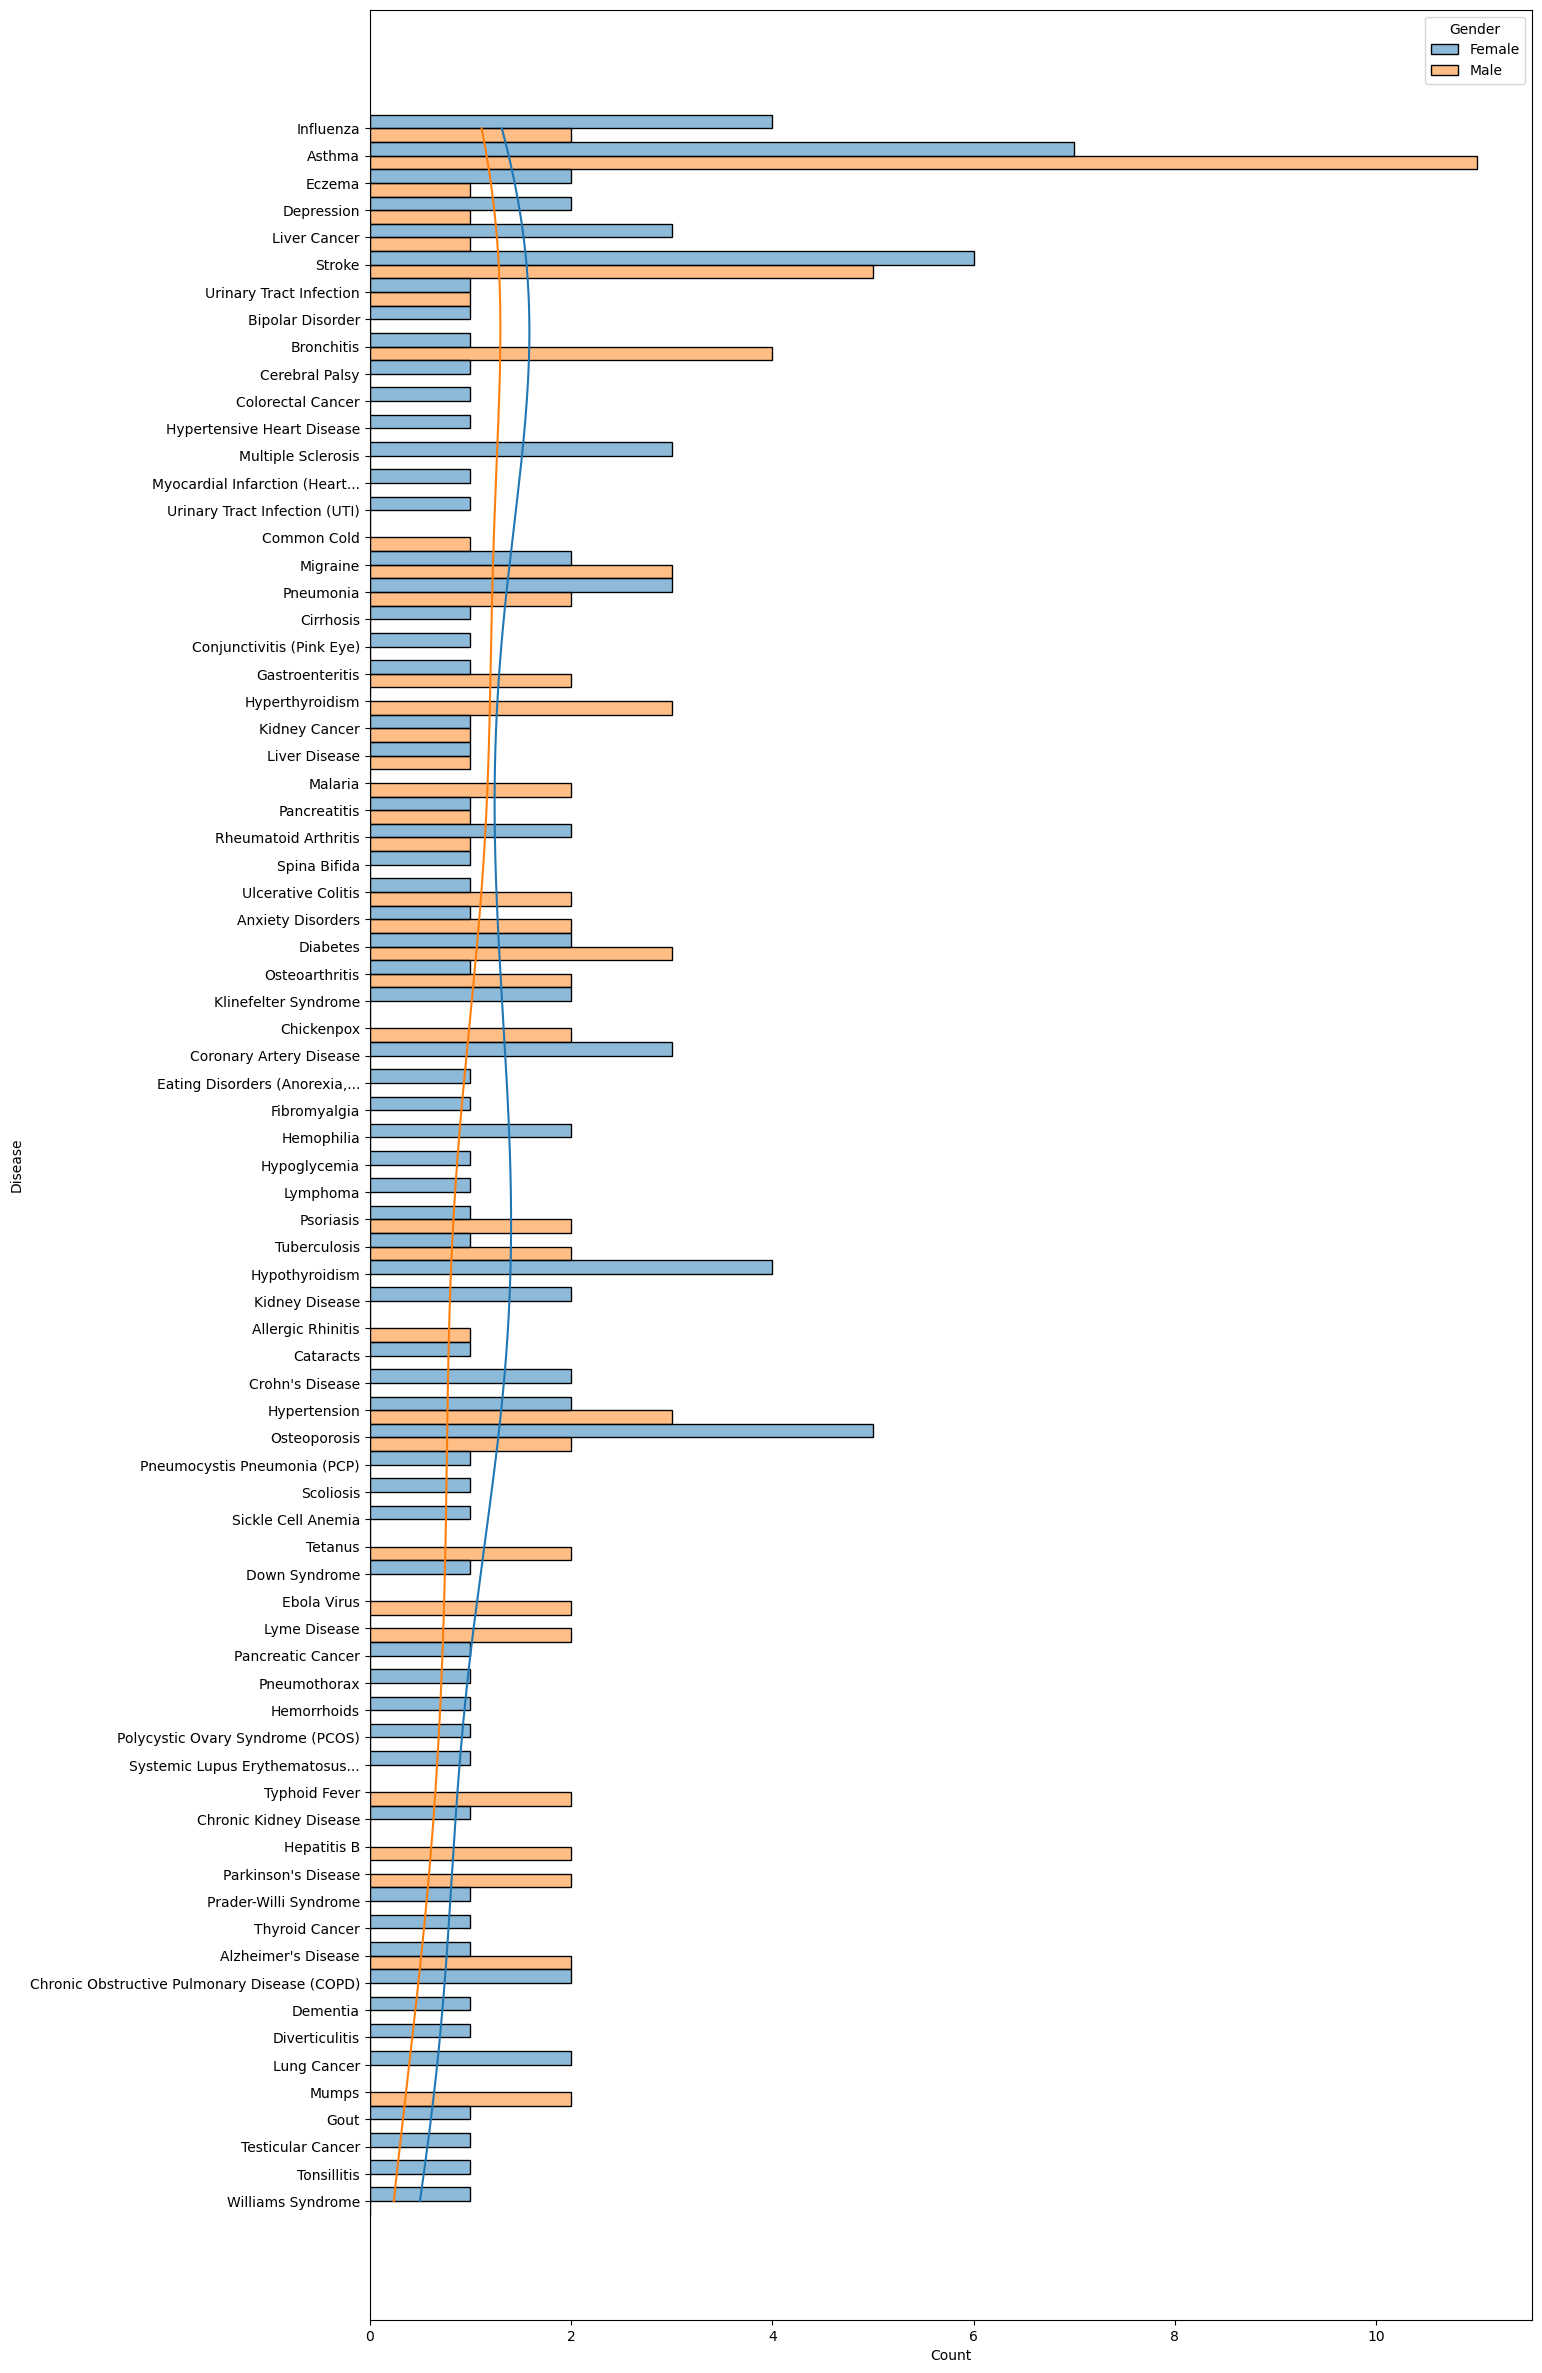

In [10]:
fig, ax = plt.subplots(figsize=(15, 30))
sns.histplot(data = positive, y = "Disease", kde = True, hue = "Gender",  multiple="dodge")
plt.show()

 We can see the distribution of the positive outcome of diseases in relation to the gender. positive outcome for a disease only show in some gender according to the dataset.
 
Lets see what symptoms indicate a positive outcome

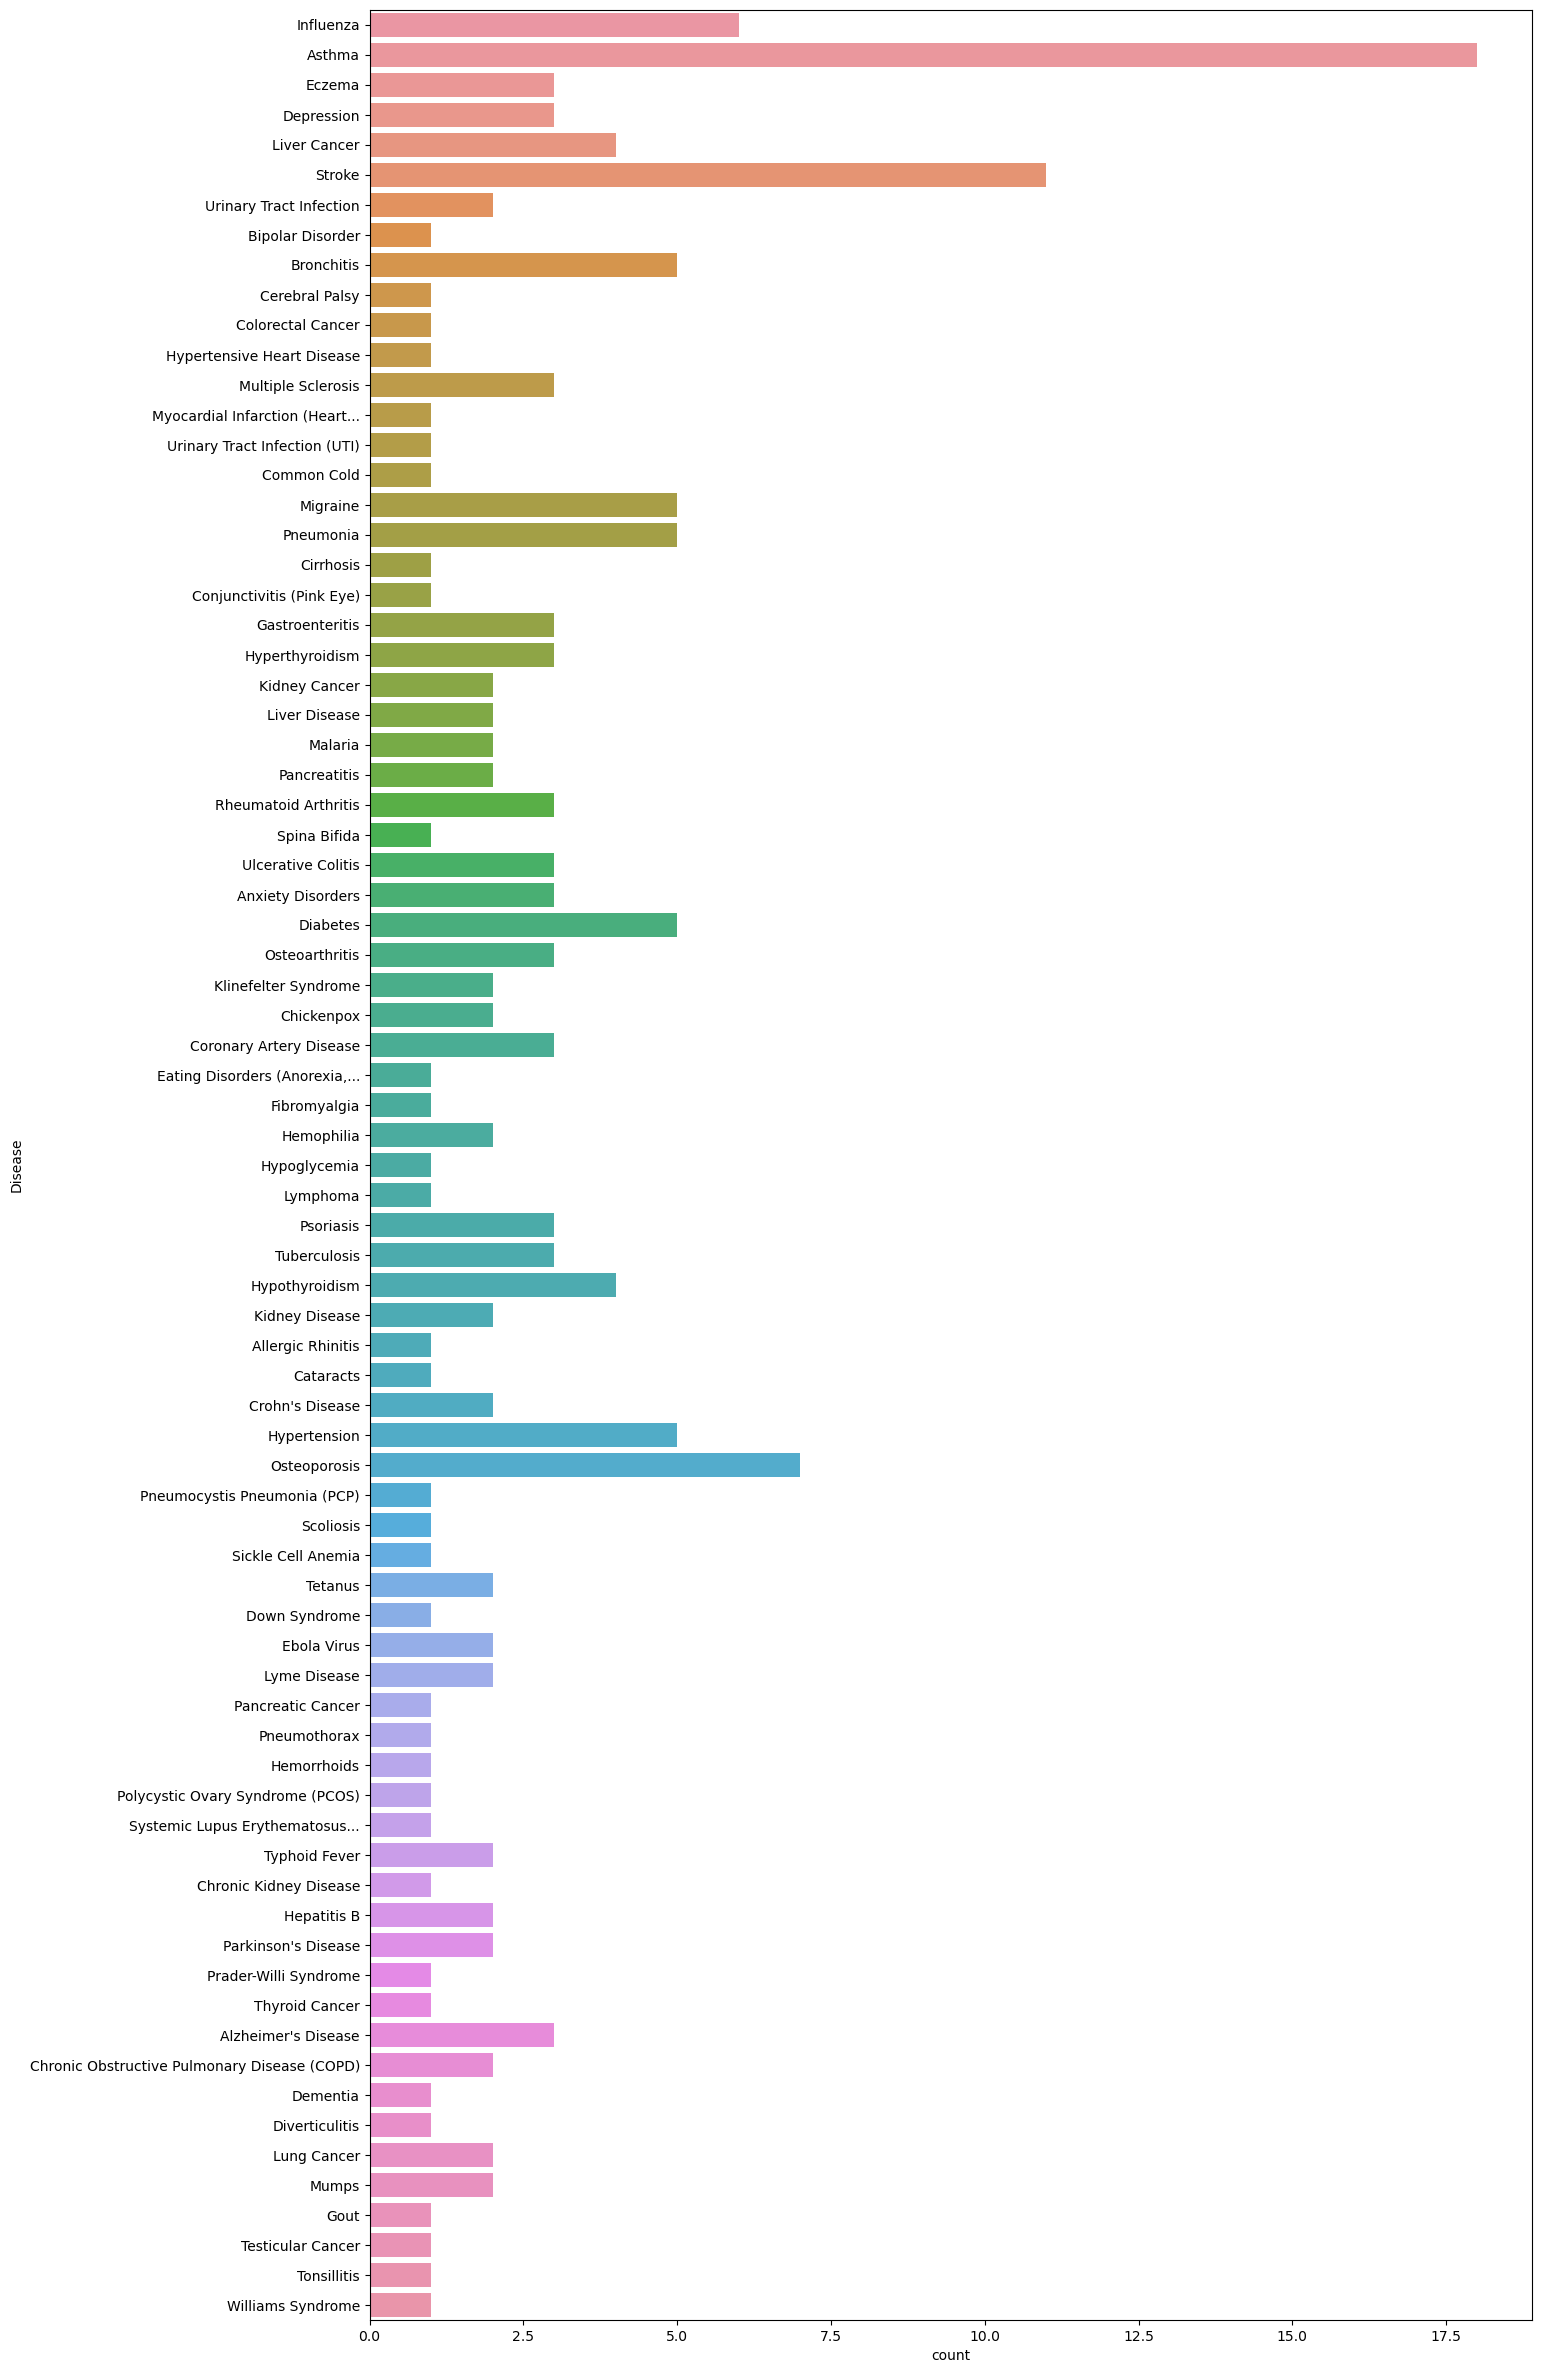

In [17]:
fig, ax = plt.subplots(figsize=(15, 30))
sns.countplot(y='Disease', data = positive)
plt.show()

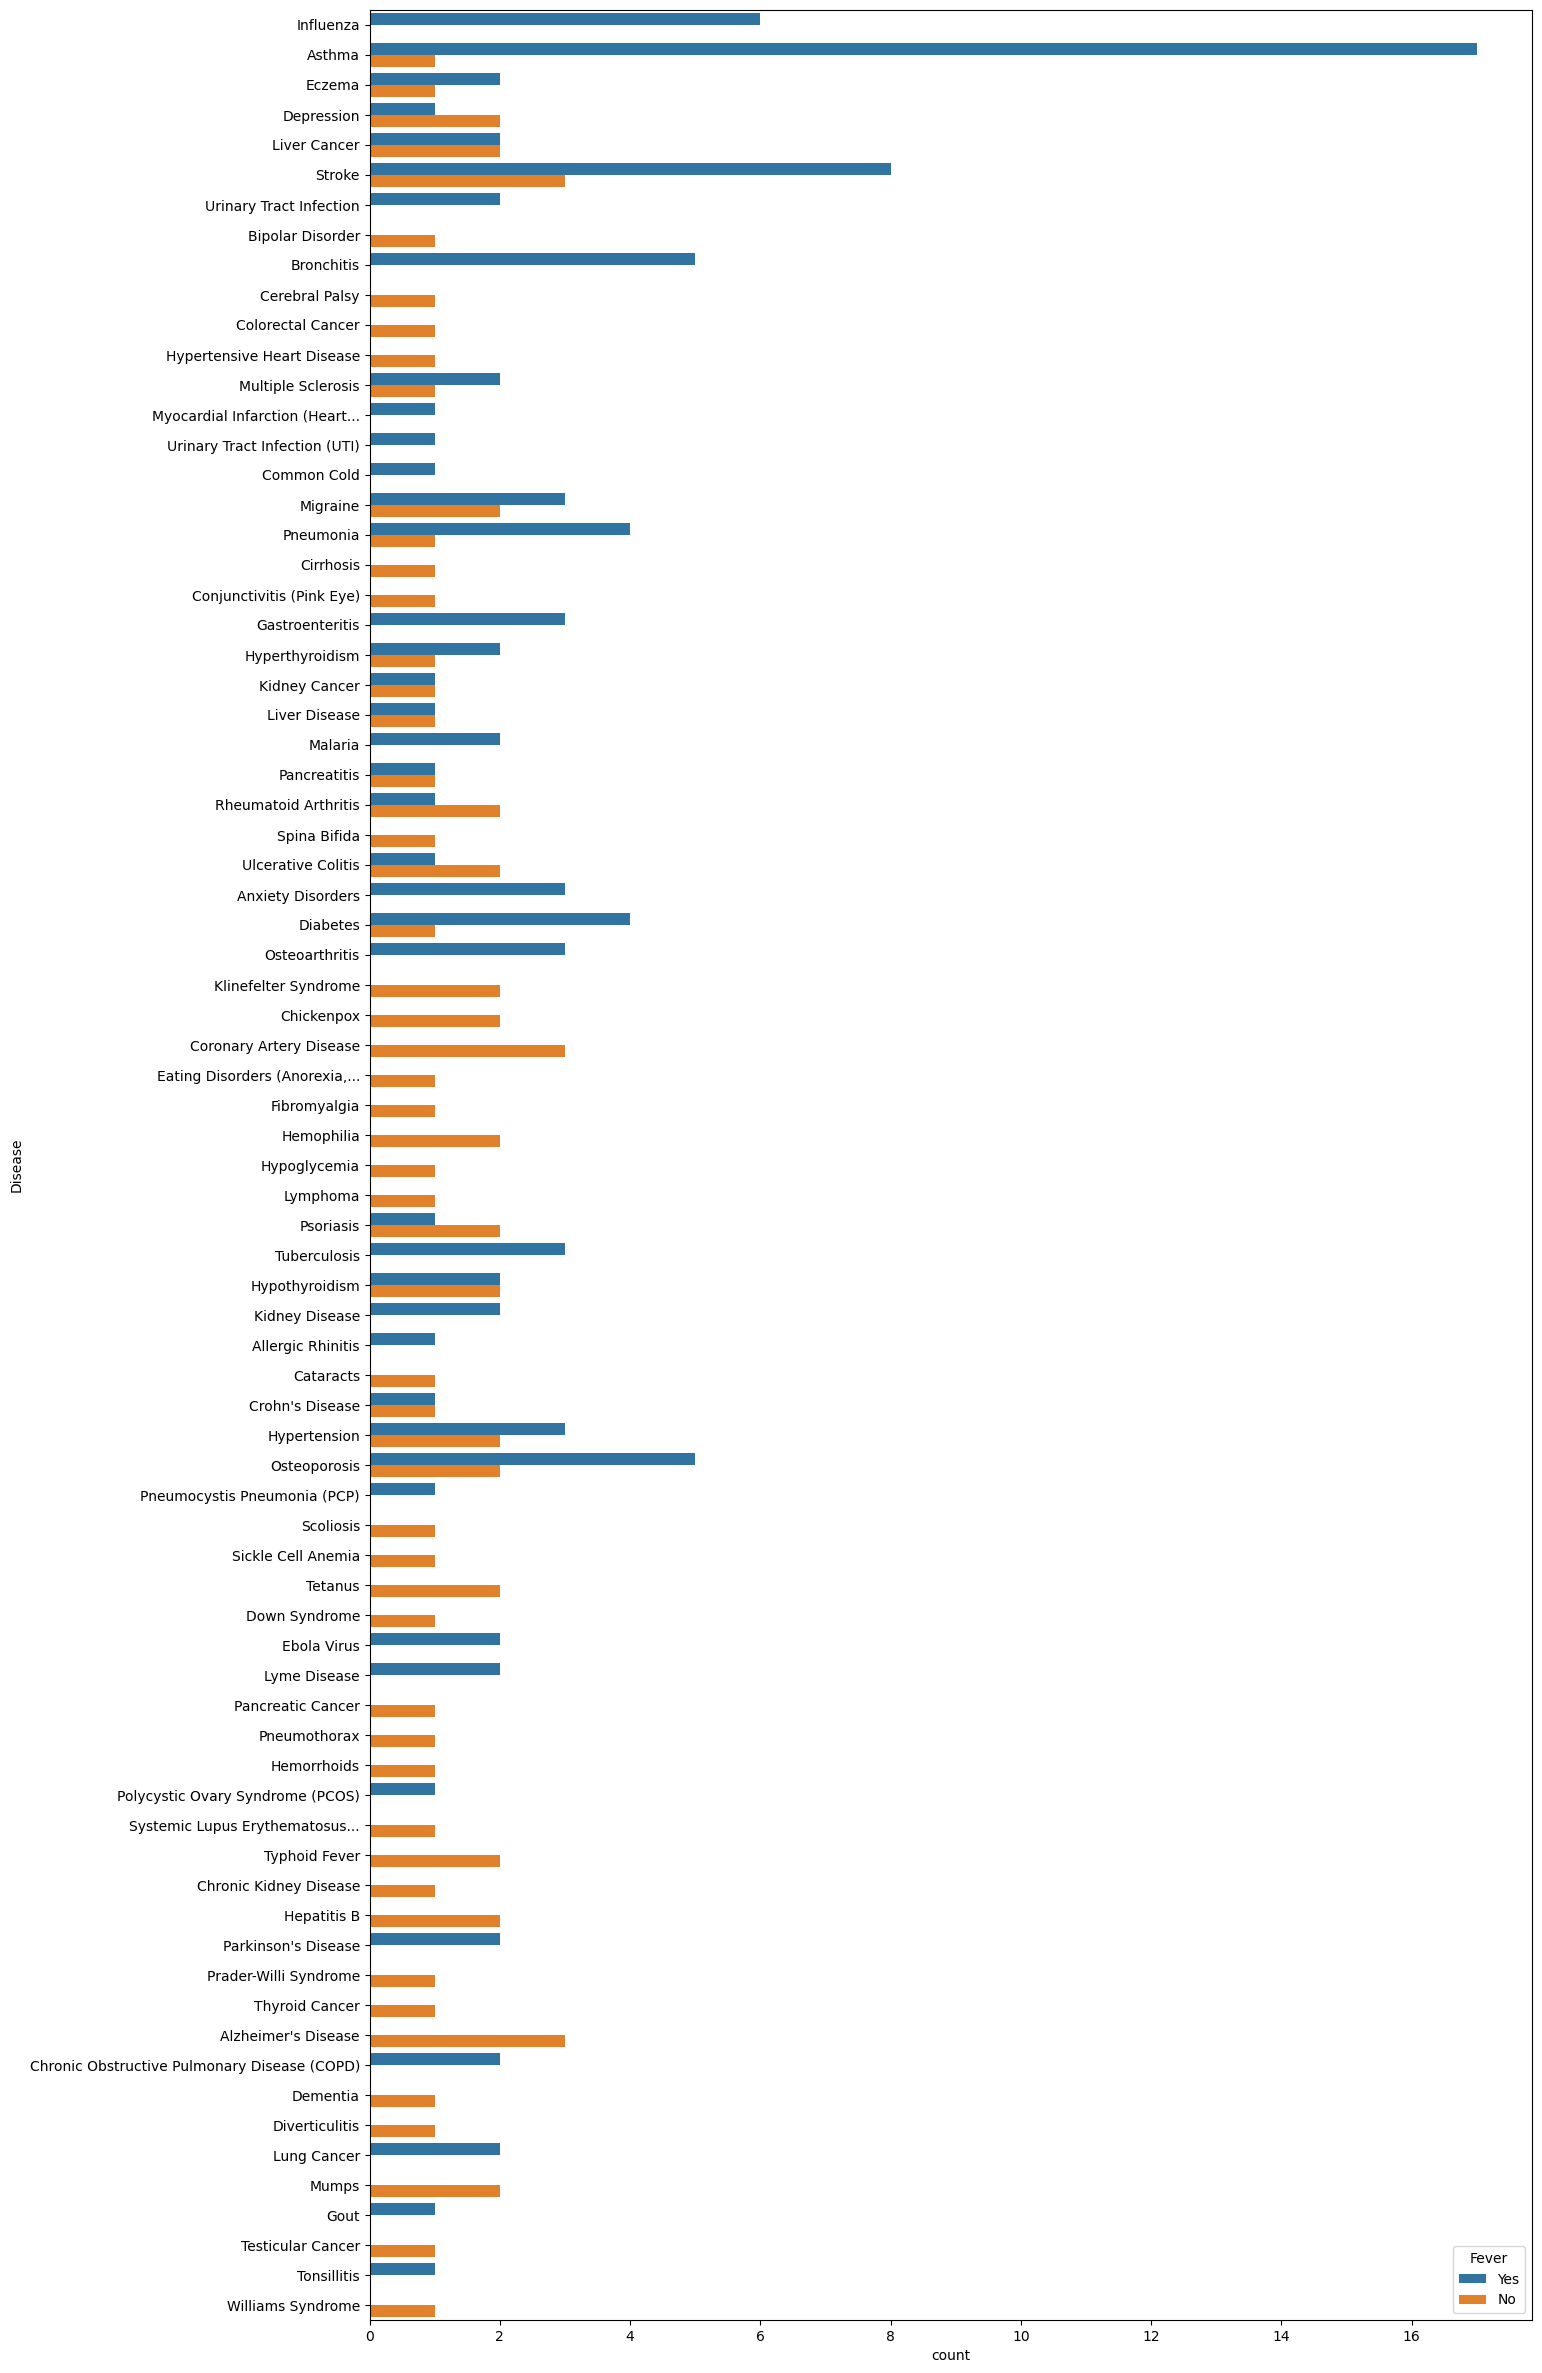

In [24]:
fig, ax = plt.subplots(figsize=(15, 30))
sns.countplot(y='Disease', data = positive, hue='Fever')
plt.show()

Fever is a prominent sign and symptom for most disease like Influenza, Asthma, Stroke, Bronchitis, Osteoporosis, Ebola Virus, Lyme Disease, Parkinson's Disease, Lung cancer and so on.

Not all positive outcome of disease had Fever as a symptoms.

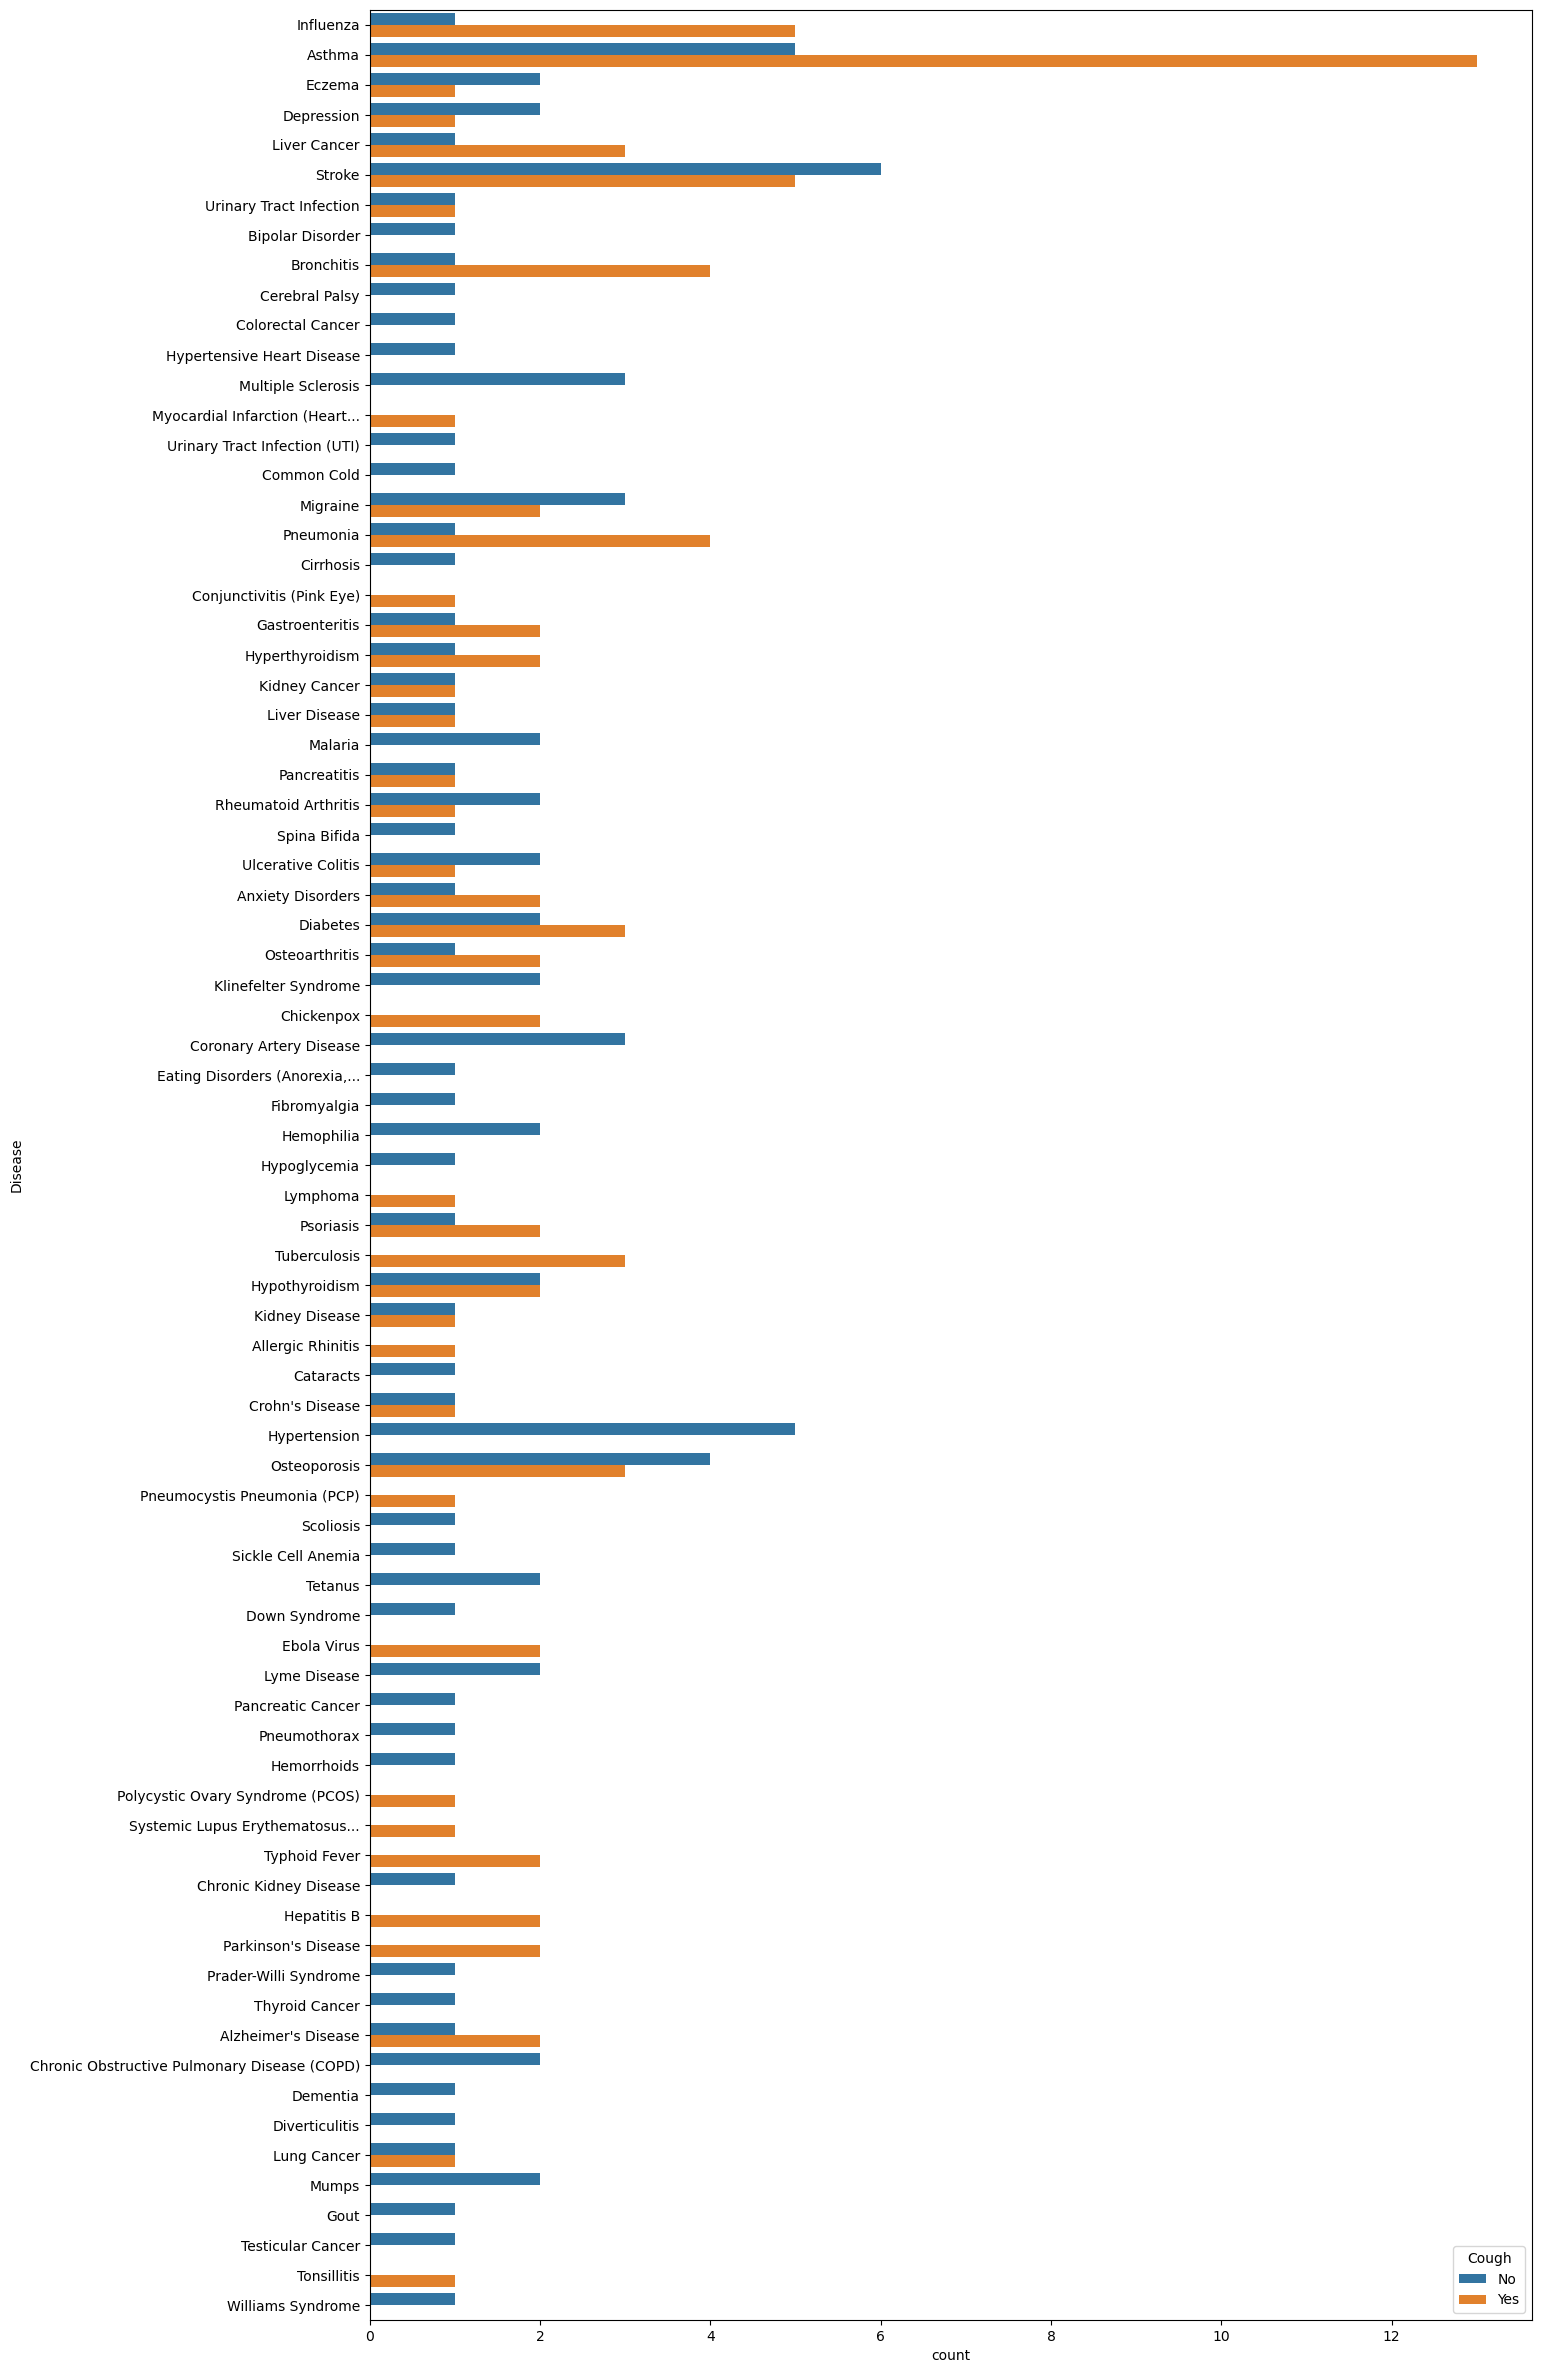

In [19]:
fig, ax = plt.subplots(figsize=(15, 30))
sns.countplot(y='Disease', data = positive, hue='Cough')
plt.show()

Influenza, Asthma, Bronchitis, Pneumonia, Tuberculosis, Typhoid Fever, Hepatitis B, Parkinson's Disease, Liver cancer amongst other have Coughing as a sign and symptom.

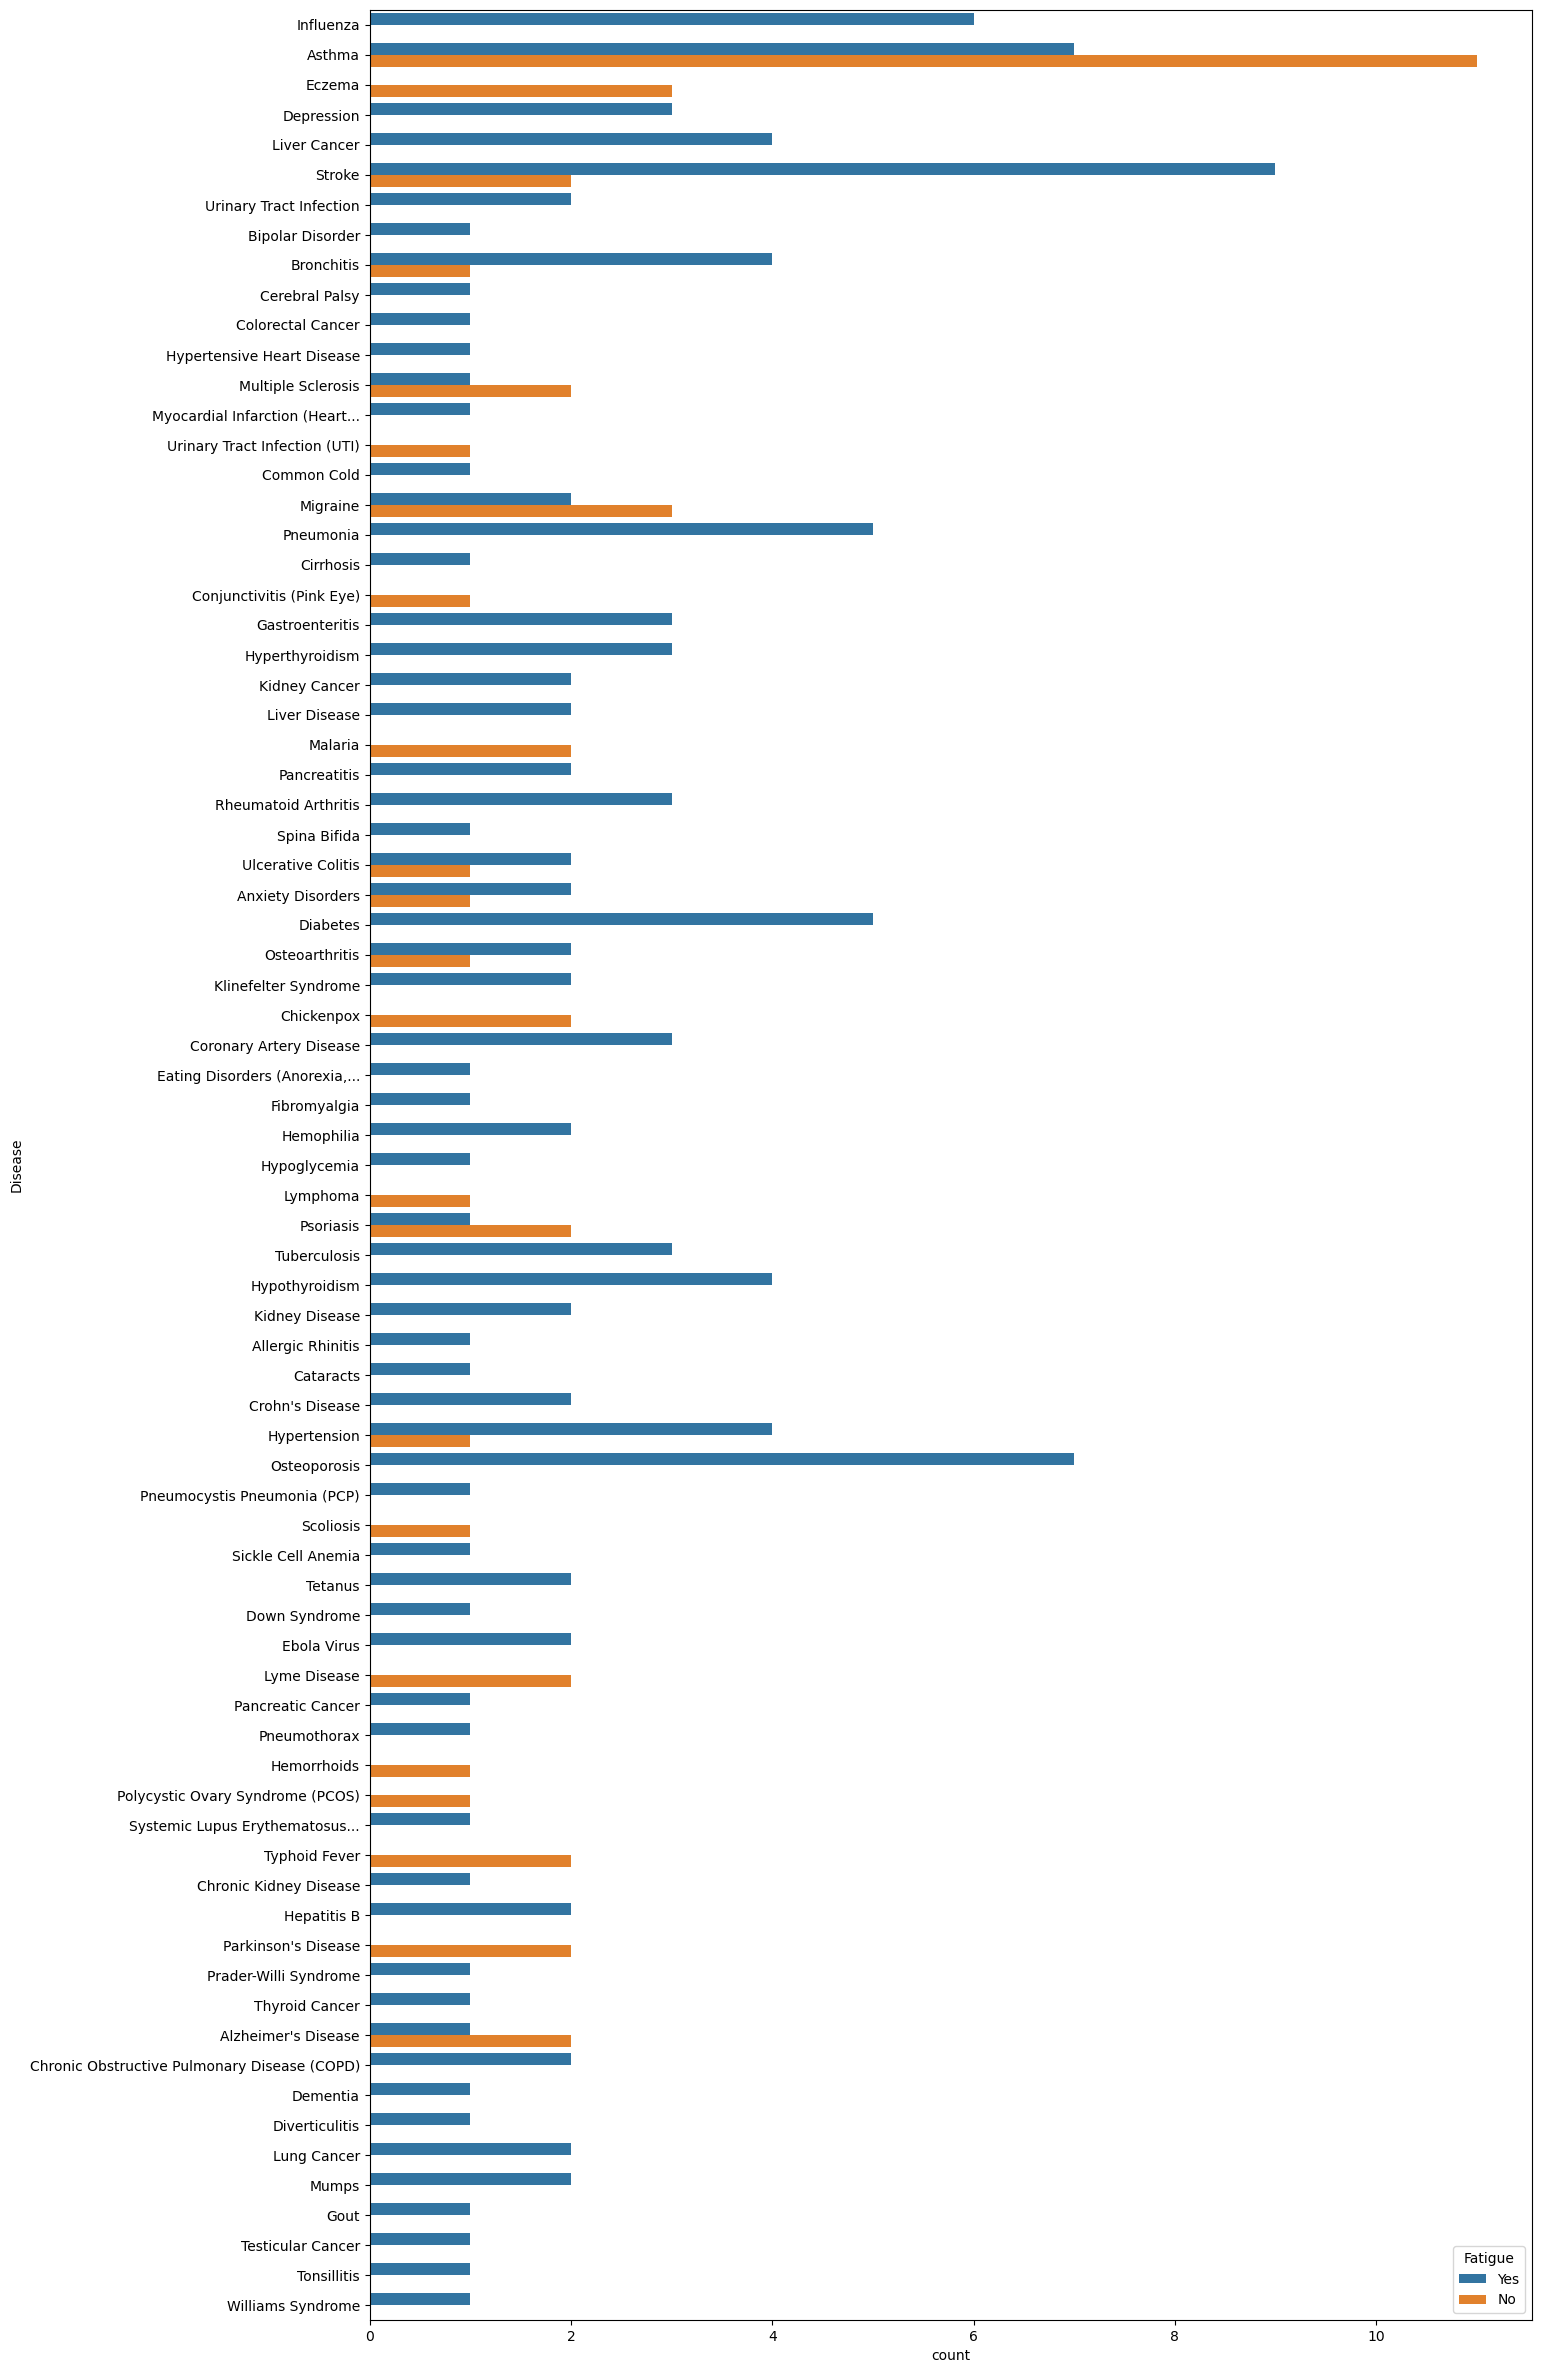

In [20]:
fig, ax = plt.subplots(figsize=(15, 30))
sns.countplot(y='Disease', data = positive, hue='Fatigue')
plt.show()

Fatigue is most prominent in Osteoporosis, Stroke and Influenza patients, Depression, Liver cancer, Bronchitis, Pneumonia, Sickle cell Anemia and others have fatigue as a sign for positive outcome.

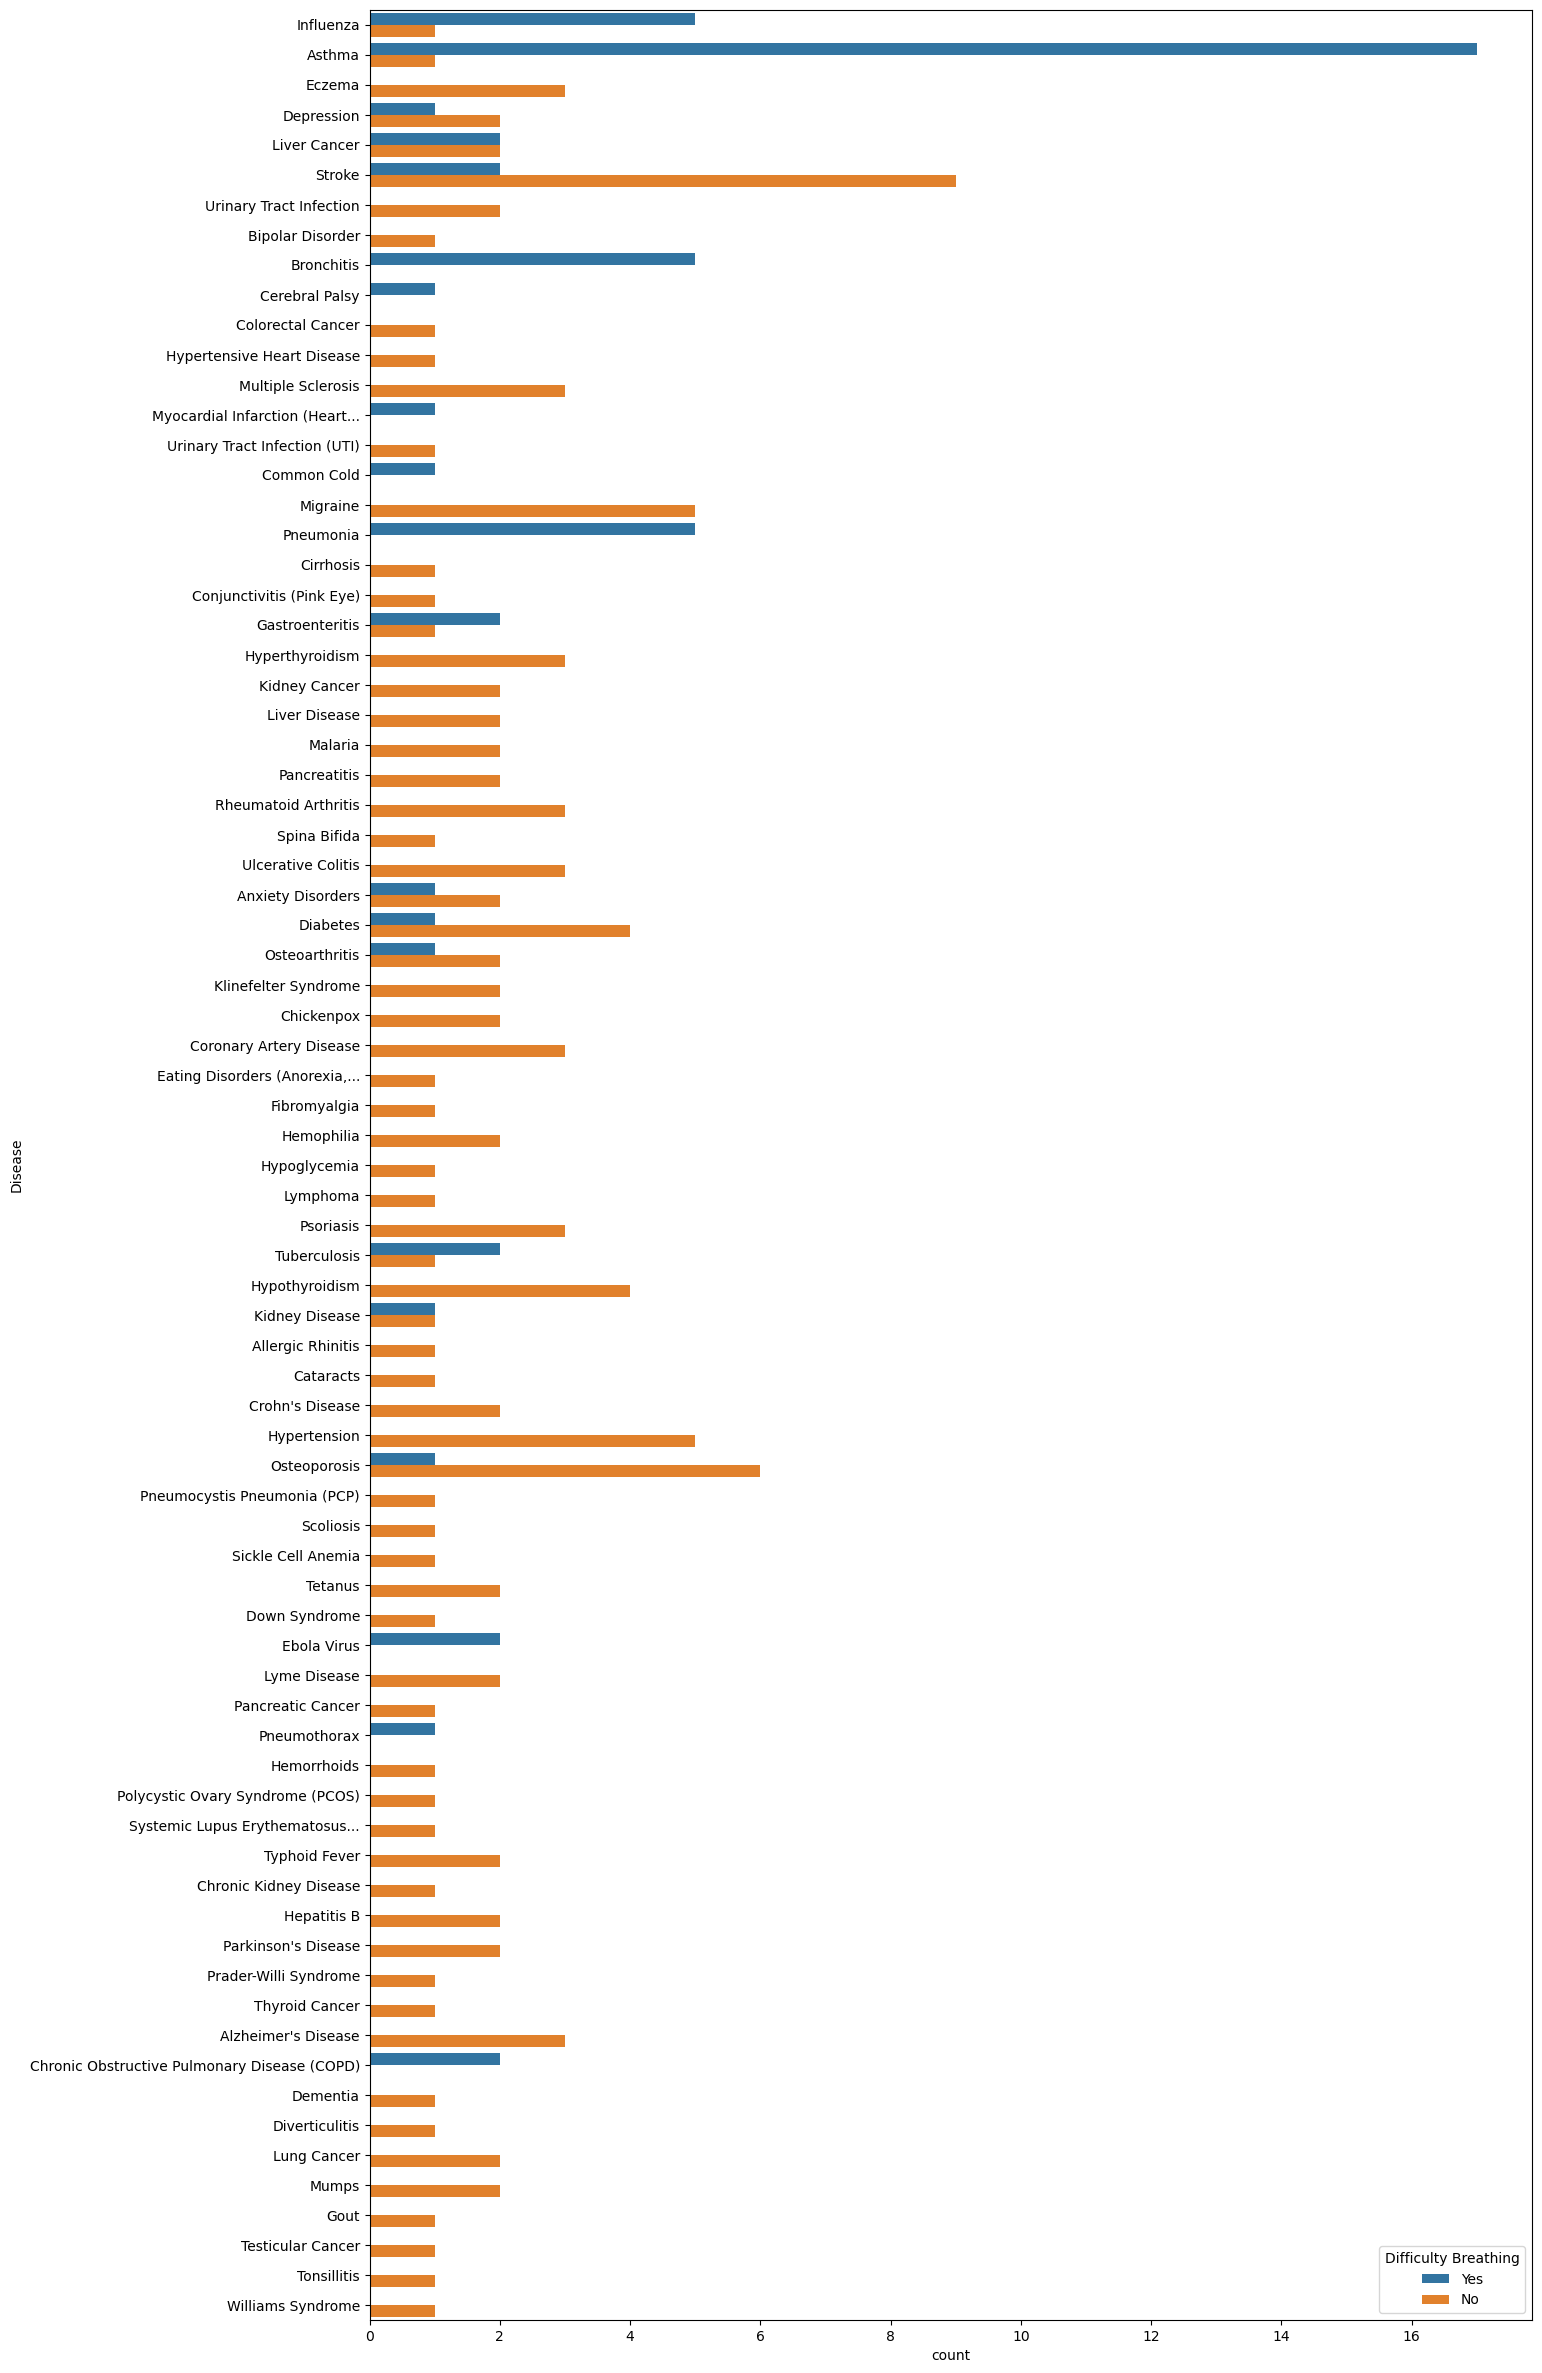

In [21]:
fig, ax = plt.subplots(figsize=(15, 30))
sns.countplot(y='Disease', data = positive, hue='Difficulty Breathing')
plt.show()

Difficulty in Breathing is affiliated mostly with Asthma, Bronchitis, Pneumonia, Myocardial Infarction, Chronic Obstructive Pulmonary Disease, influenza and  a few others

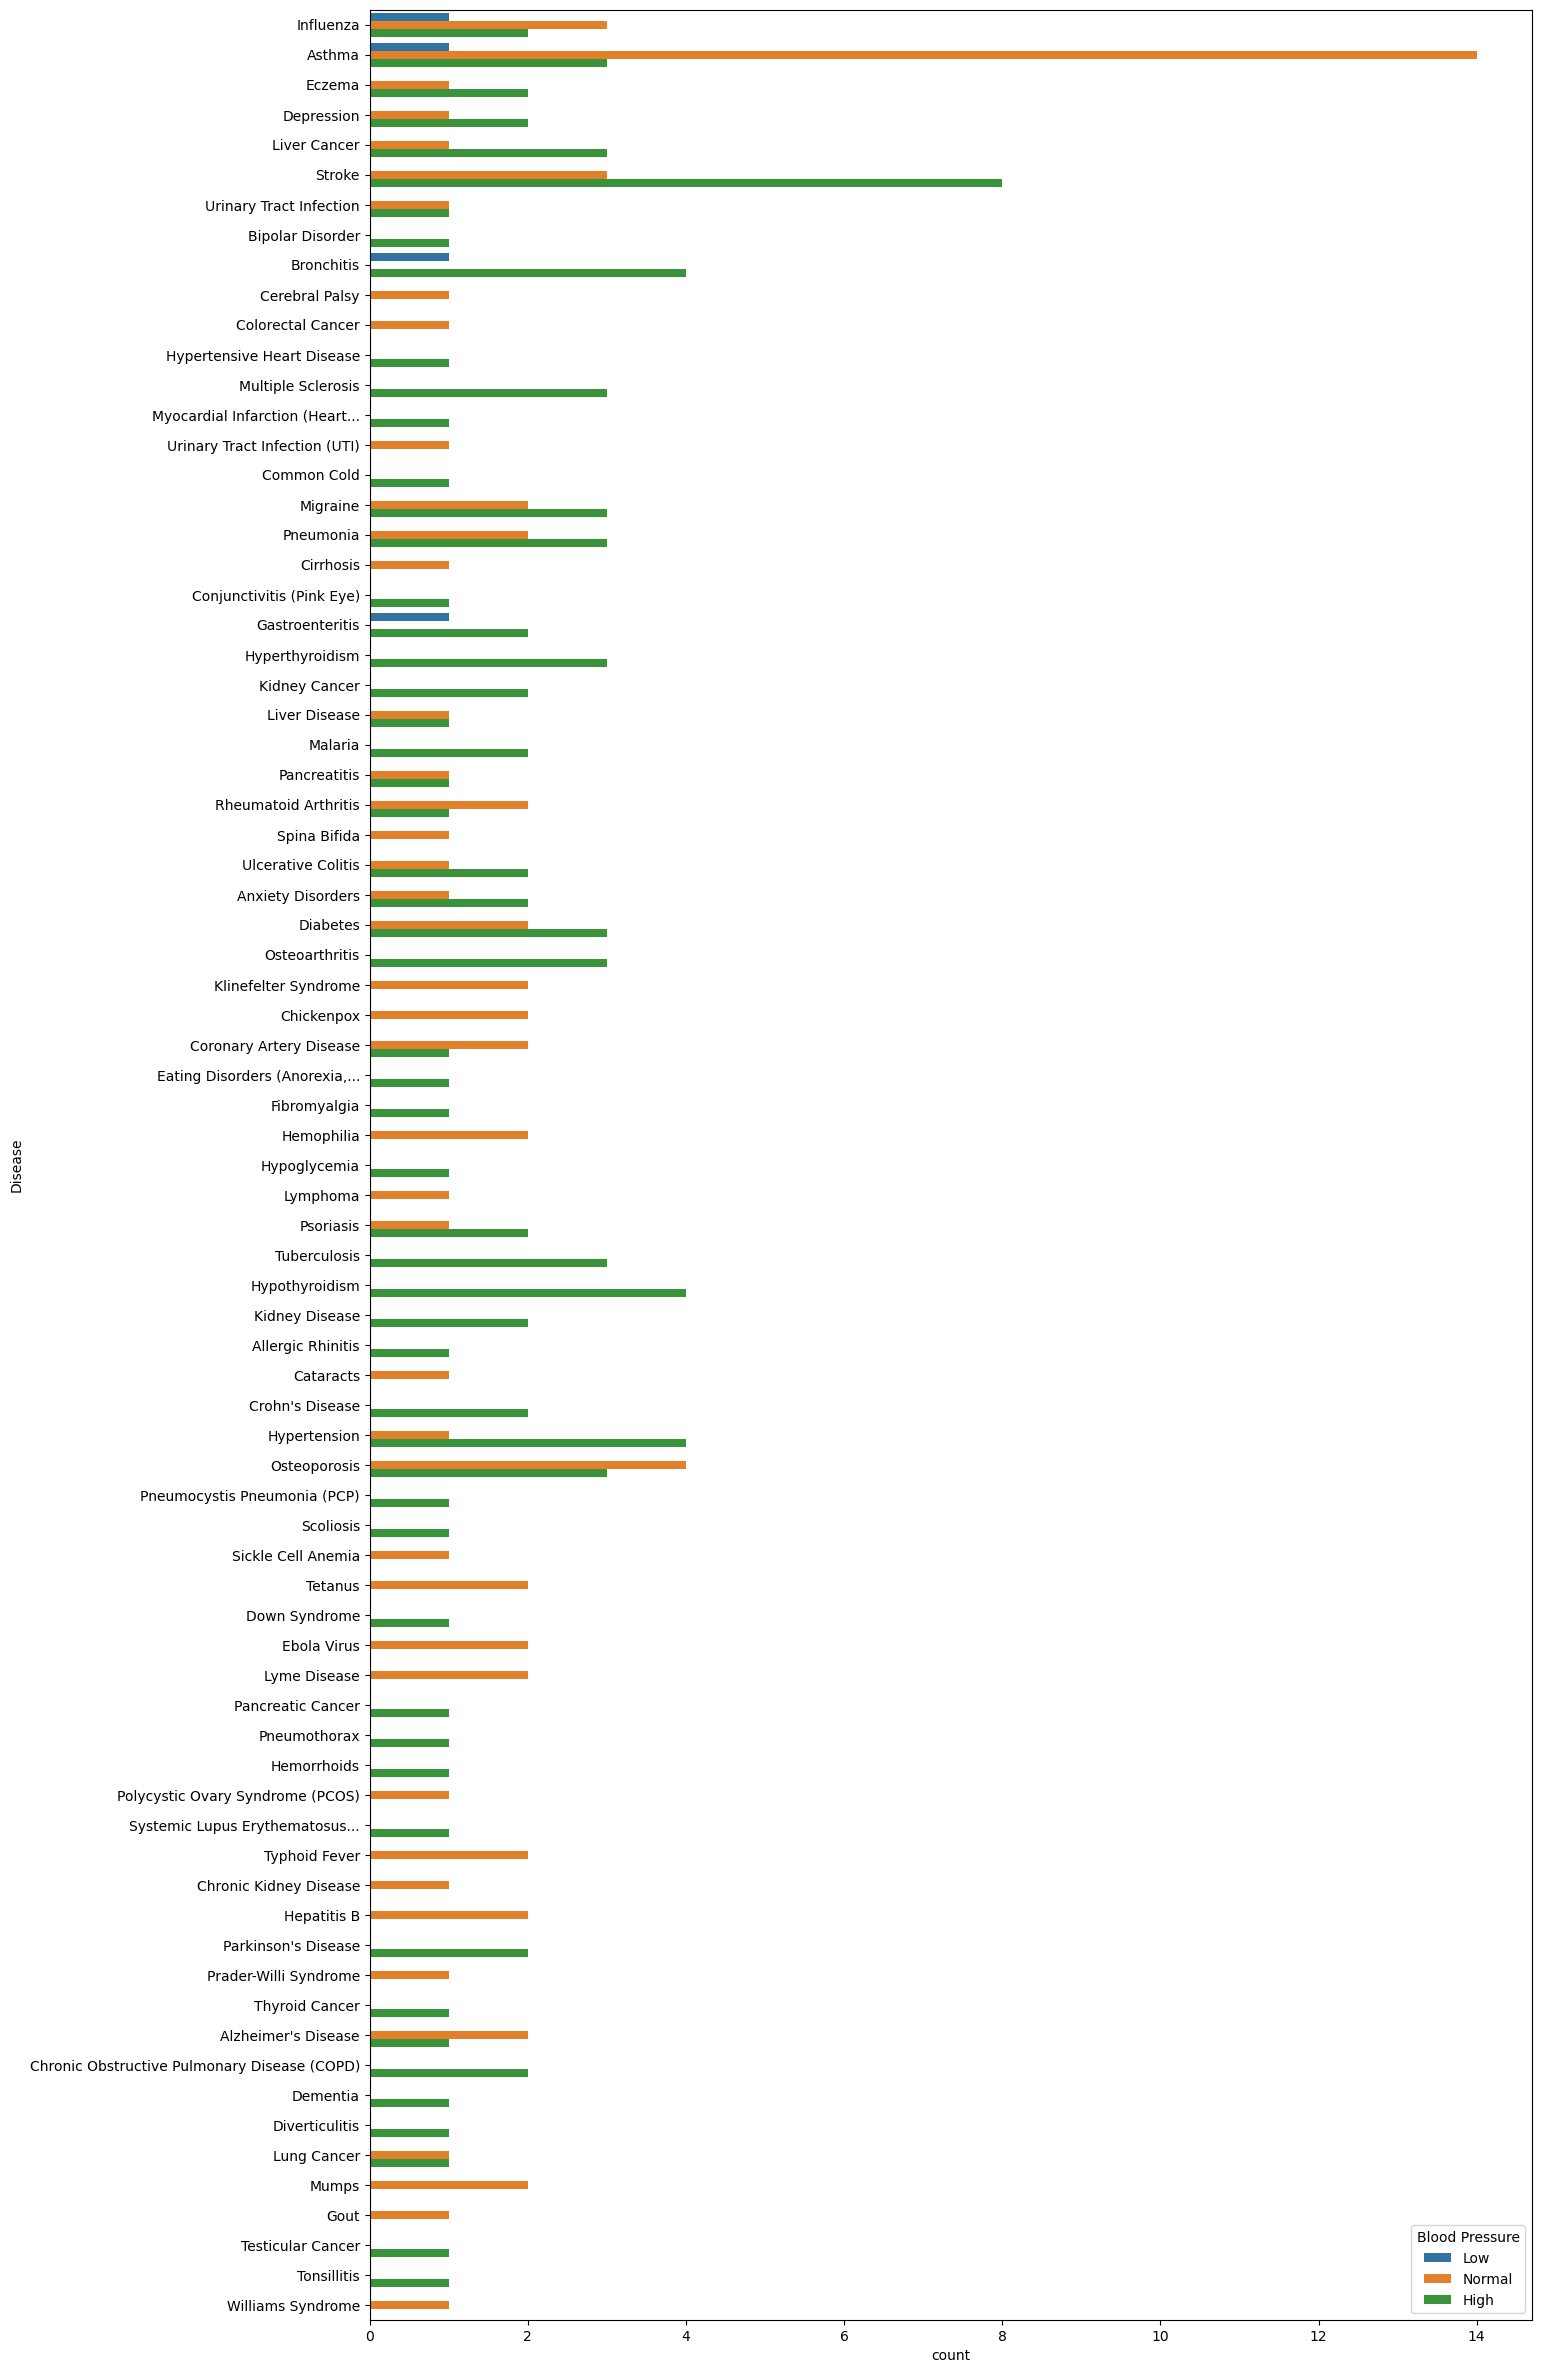

In [22]:
fig, ax = plt.subplots(figsize=(15, 30))
sns.countplot(y='Disease', data = positive, hue='Blood Pressure')
plt.show()

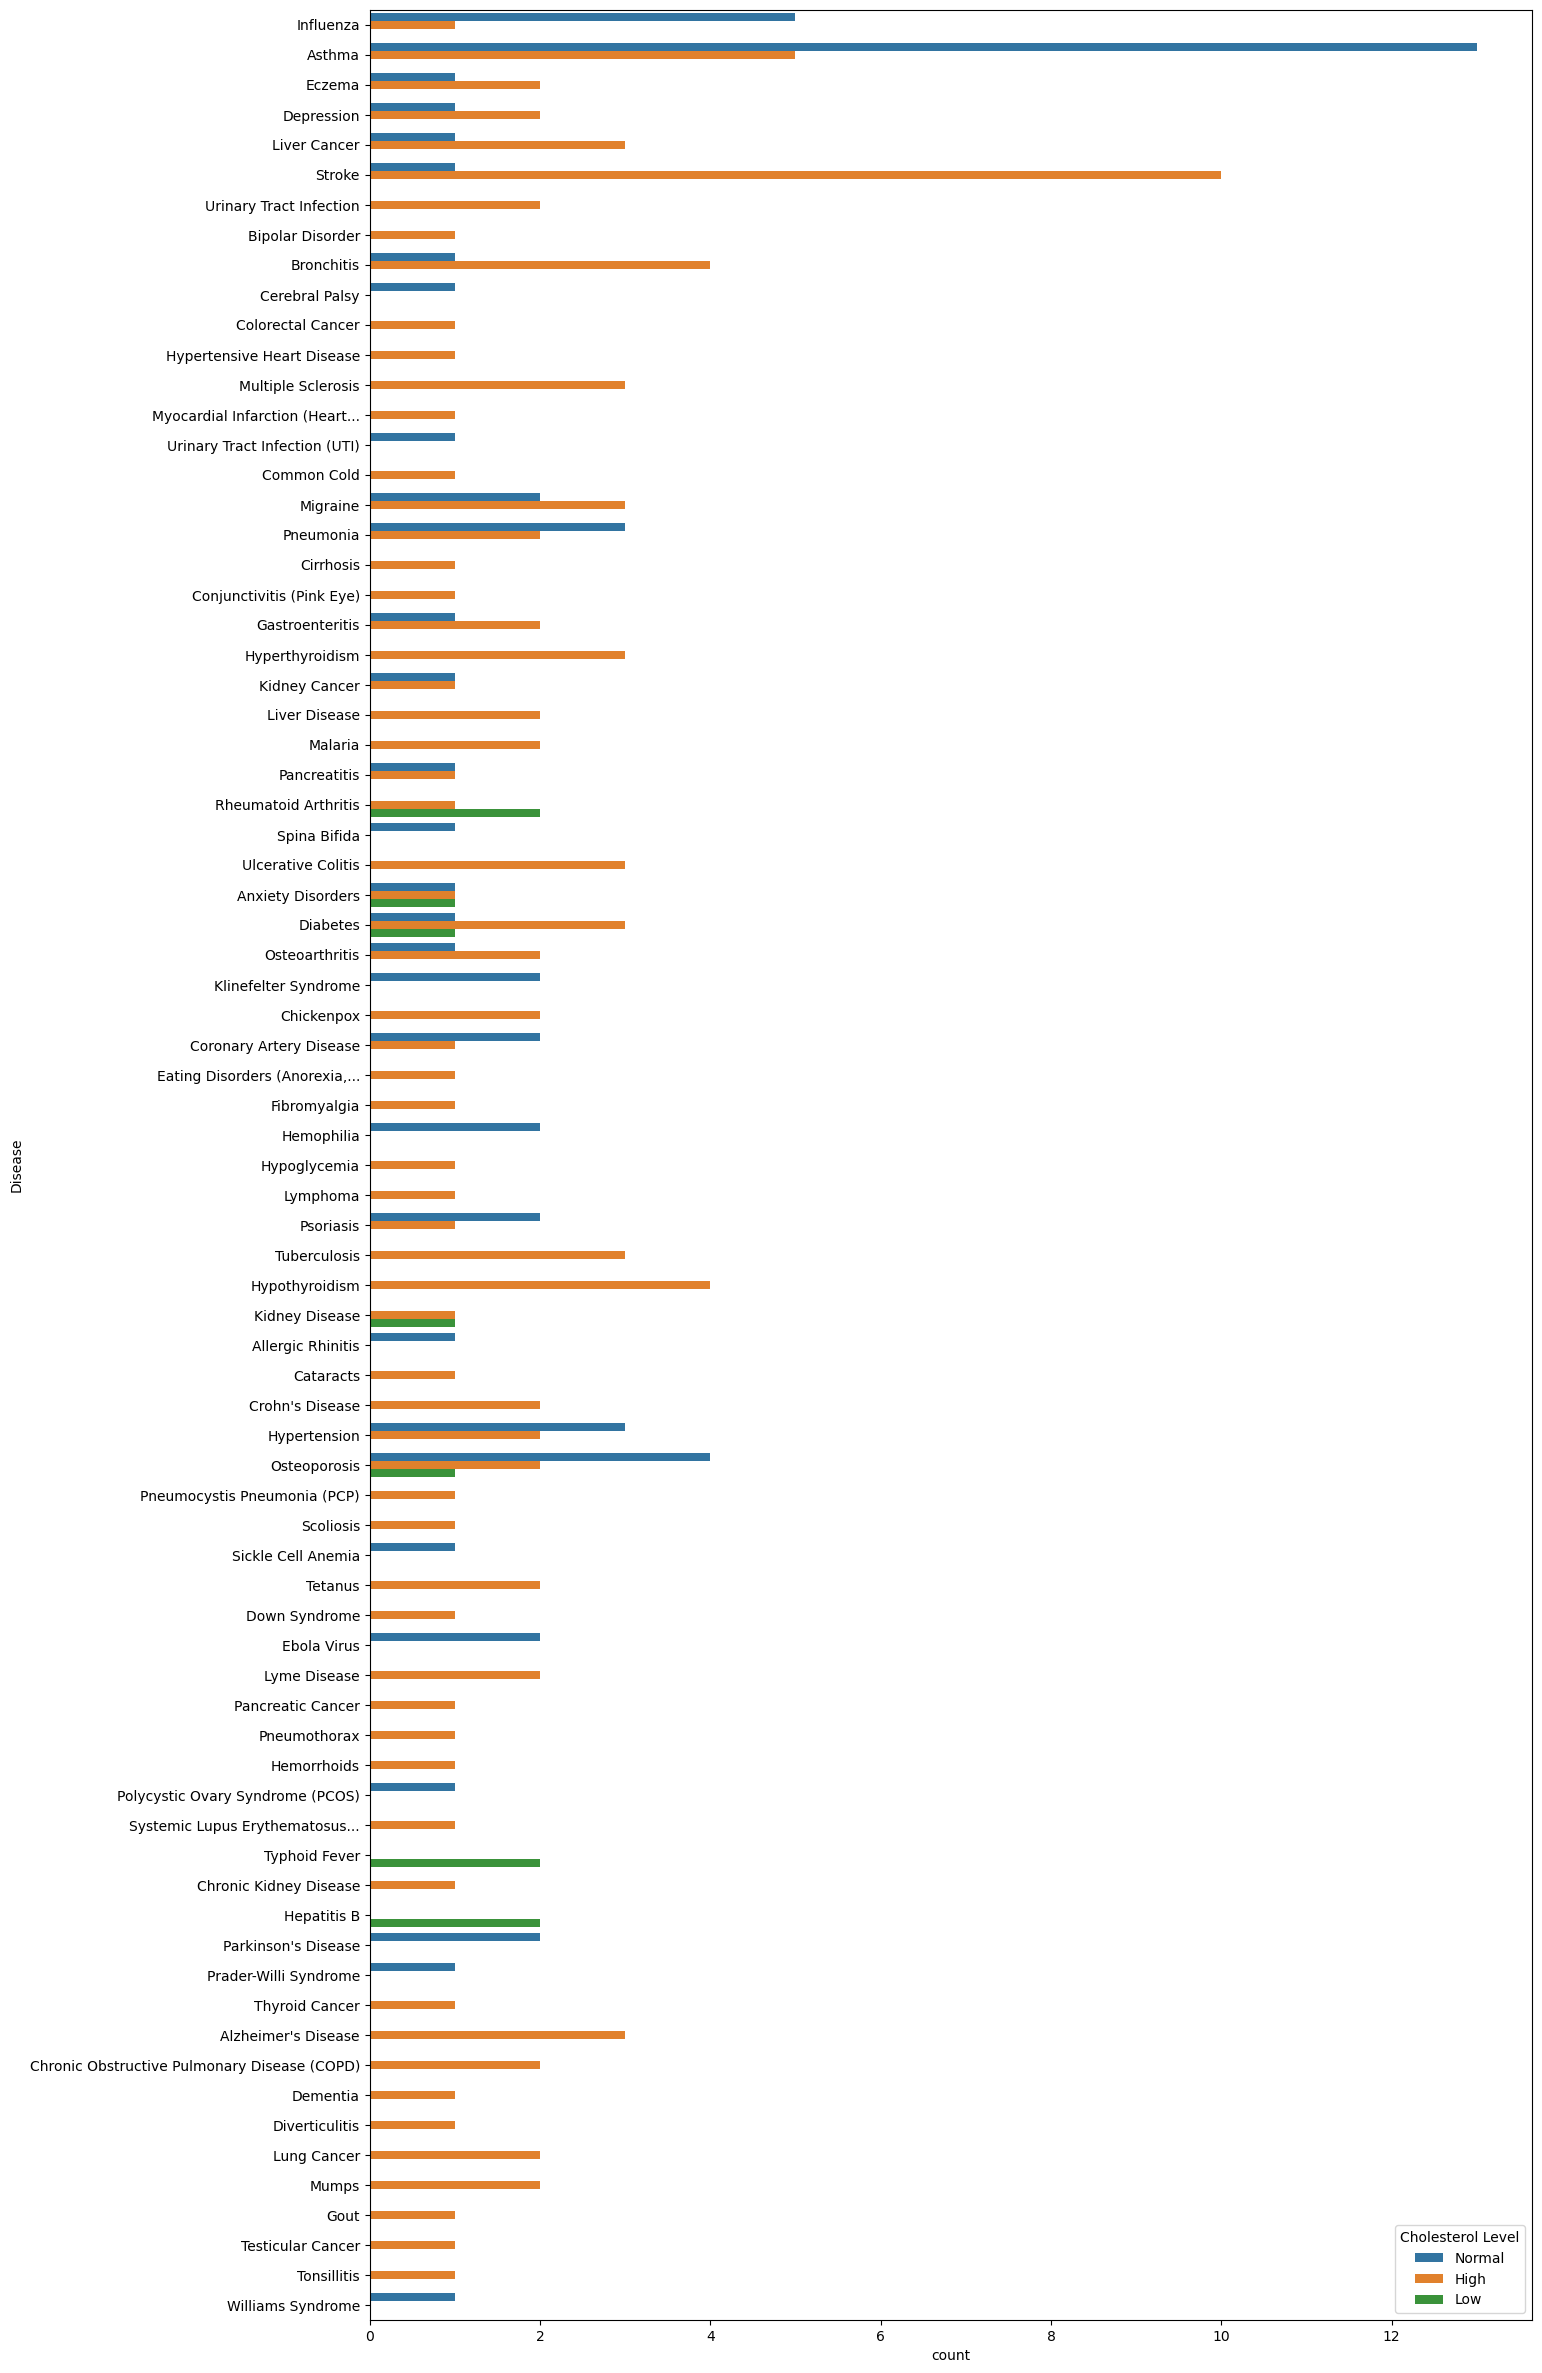

In [23]:
fig, ax = plt.subplots(figsize=(15, 30))
sns.countplot(y='Disease', data = positive, hue='Cholesterol Level')
plt.show()

In [9]:
# shows the number of unique items under each category
p = positive[['Disease', 'Cholesterol Level', 'Blood Pressure', 'Difficulty Breathing']]
result = p.groupby('Disease').agg({
    'Cholesterol Level': 'nunique',
    'Blood Pressure': 'nunique',
    'Difficulty Breathing': 'nunique'
}).reset_index()
result

,Disease,Cholesterol Level,Blood Pressure,Difficulty Breathing
0,Allergic Rhinitis,1,1,1
1,Alzheimer's Disease,1,2,1
2,Anxiety Disorders,3,2,2
3,Asthma,2,3,2
4,Bipolar Disorder,1,1,1
...,...,...,...,...
72,Typhoid Fever,1,1,1
73,Ulcerative Colitis,1,2,1
74,Urinary Tract Infection,1,2,1
75,Urinary Tract Infection (UTI),1,1,1
